<a href="https://colab.research.google.com/github/marianqian/Intro-to-ML-and-DL-Using-fast.ai/blob/master/notebooks/Lesson_6_Implementing_CNN_with_fast_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the AI Academy! This is the sixth lesson, focused on learning how to use the fast.ai library to build convolutional neural networks (CNNS). We used [fastai](https://www.fast.ai/) in the Lesson 4 and Lesson 5 Google Colab notebooks, so please make sure you understand how the data was loaded and processed and how normal, or fully connected, neural networks because we will be building upon that previous knowledge in this notebook.

You can learn more about fastai [here](https://docs.fast.ai/); the library is split between four different parts, which are vision, text, tabular, and collab models. fastai focuses on neural networks, and for the rest of the course we will be exploring how to use this library. 

The creater of fastai, Jeremy Howard, also taught a course explaining how to use the library and introduces deep learning to those who have no experience with it before. We highly recommend you to look at his videos linked [here](https://course.fast.ai/videos/?lesson=1) when you have the time. 

NOTE: Educational use and distribution is permitted, but credit and attribution to AIM Academy is required. 

#Learning Objectives: 
* Understand how to use convolutional neural networks (CNNs)
* Understand how to freeze and unfreeze certain parts of the neural network
* Create personal dataset using Google Images

We will be using the code from the [fastai Lesson 1 - What's your pet notebook](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson1-pets.ipynb) and the [fastai Lesson 2 Creating your own dataset from Google Images notebook ](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb) to guide you through creating your own convolutional neural network and your own Google Images dataset. 


```
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE
```




Run the following code block to allow the graphs and plots we will be printing out in this notebook to print out properly. 

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We will use the the `fastai.vision` section of the `fastai` library, and we will first use a convolutional neural network (CNN) to differentiate types of pets (breeds of dogs and cats). The `fastai.vision` section of the fast.ai library focuses on computer vision techniques and using pictures as data. 

From `fastai.metrics`, we will import the `error_rate` metric, which gives the error (1 - accuracy) during training after one epoch. 

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

Here, we use `URLs.PETS` to access the images we want to use for the CNN by passing it through the `untar_data`method. These images include 12 different cat breeds and 25 different dog breeds from the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/). After calling `path.ls()`, we can see that the path to the images are from the `oxford-iiit-pet` folder, and in that folder, there are two other folders containing the data we are planning to use, `annotations` and `images`. 

In [0]:
path = untar_data(URLs.PETS)
print(path)
path.ls()

/root/.fastai/data/oxford-iiit-pet


[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

Here we define `path_anno` and `path_img` variables, which are paths to the `annotation` and `images` folders. 

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

We call `get_image_files` from the `ItemList` class specific to vision from  `fastai.vision`, which returns a list of paths, `fnames`, accessing the individual images. 

Listed in the output box are the paths of the first five images. 

In [0]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_109.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_46.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_88.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/havanese_129.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_15.jpg')]

The labels themselves are in the **filename of the file** when in other notebooks the images were separated into folders, with each folder name having the label. We will use a regular expression to extract the label (for example, chihuahua or havanese) from the filename. 

In [0]:
pat = r'/([^/]+)_\d+.jpg$'

Now we can create an ImageDataBunch by using the `from_name_re` method, which will look at the filename for the label of the pictures. We pass in the regular expression, `pat`, into the method. 

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=64
                                  ).normalize(imagenet_stats)

Using `show_batch`, we can show the first samples in the dataset.

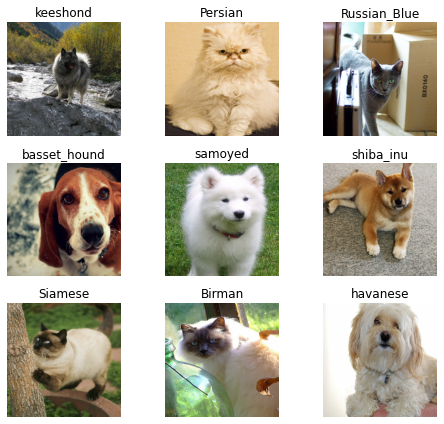

In [0]:
data.show_batch(rows=3, figsize=(7,6))

Now we can create a `learn` object by calling `cnn_learner`, which is the convolutional neural network. We pass in `data`, which is an `ImageDataBunch`, and we will use the weights from the pre-trained ResNet 34 model in our model instead of training from the very beginning. 

Notice how we pass in the `error_rate` metric we imported earlier from the `metrics` library. 

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate) #imagedatabunch as data - has traiing/validation/testing

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


By calling `learn.model`, we see all the different layers, including convolutional layers and the final layer, which is a normal (fully connected) layer. The model's inputs are pictures, which are fed into the convolutional layers, and outputs the probabilities as numbers for which breed the pet in the picture is through the final fully connected layer. 

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

We start training the model by calling `fit_one_cycle` for 4 epochs.  

In [0]:
learn.fit_one_cycle(4) 

epoch,train_loss,valid_loss,error_rate,time
0,1.333610,0.347918,0.107578,30:07


The model's weights are saved under the name `stage-1`. 

In [0]:
learn.save('stage-1')

We also want to look at how well our convolutional neural network is performing. We create an `interp` object, which looks at the predictions the model has made, by passing in our model, `learn`, in the method `ClassificationInterpretation.from_learner`. 

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

The graph you see below is a confusion matrix. A confusion matrix plots the predicted labels on the x-axis and the actual labels on the y-axis. The predictions along the left diagonal line are correct, while any other predictions in the matrix are incorrect. You can see that besides the dark diagonal, our model messes up some of the breeds for the pets. 

In order to improve our model's performance, we can finetune and keep training sections of our model. 

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

By using `lr.find()`, we can pick a custom learning rate for our model. 

In [0]:
learn.lr_find()
learn.recorder.plot()

We will `unfreeze()` our convolutional neural network, which means that we will be training all of the layers after the fully connected layer. 

TWe train the model for 2 epochs, and we give the two learning rates, one maximum and minimum learning rate for the one cycle learning. 

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

#Using Google Images to create your own dataset
If you want to create your own convolutional neural network, you can use Google Images to download image URLs and extract them using fast.ai. We will practice creating a dataset to differentiate dogs and cats.

Go to Google Images, and check to see that your ad blocker is turned off. Search a dogs or cats in the search bar, and scroll down until you have seen the number of images you want to download. 

As from the [fastai Lesson 2 Download notebook](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb ): 
*Press CtrlShiftJ in Windows/Linux and CmdOptJ in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands. You will need to get the urls of each of the images. You can do this by running the following commands.*

```
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```



After you have run the above commands, a download prompt should show up. Download the file onto your computer under the name "dogs.csv" or "cats.csv". Repeat this process for cats and dogs or for all the labels you want your convolutional neural network to learn. 

For Google Colaboratory, on the left side there is a side bar with three options. Click the bottom icon which looks like a folder and run the code block below. 

In [0]:
path = Path('/content/data/animals')

After running the code block you should see a `content` folder. Open that folder, and open the `data` folder, and then the `animals` folder. Upload the "dogs.csv" and "cats.csv" files you downloaded into the `animals` folder. 

Run the following code blocks in order. 

In [0]:
folder = 'cat'
file = 'cats.csv'

In [0]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'dog'
file =  'dogs.csv'

In [0]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=200)

Here we define our labels or classes we want our convolutional neural network to learn. Our two classesa are `cat` and `dog`. 

In [0]:
classes = ['cat', 'dog']

For each image we downloaded, we verify whether we can actually open the picture. If we cannot, then the picture is not used and is deleted. 

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

cat


dog


Now in our `animals` folder, we have two folders, one for each label. 

In [0]:
path.ls()

[PosixPath('/content/data/animals/cat'),
 PosixPath('/content/data/animals/dog'),
 PosixPath('/content/data/animals/cats.csv'),
 PosixPath('/content/data/animals/dogs.csv')]

We can create an `ImageDataBunch` using the folder name as labels. 

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

The two labels we want our convolutional neural network to predict are `cat` and `dog. 

In [0]:
data.classes

['cat', 'dog']

These are the images we downloaded. 

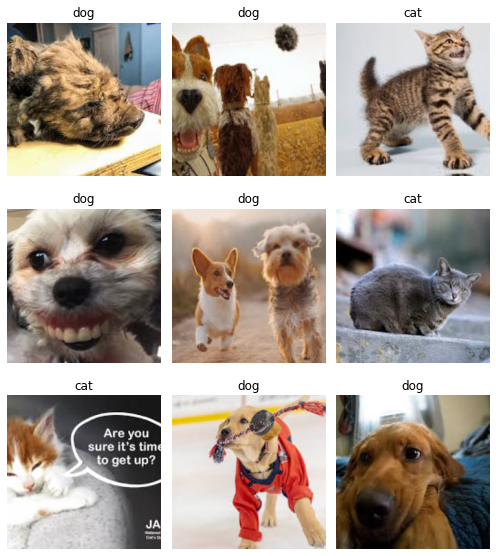

In [0]:
data.show_batch(rows=3, figsize=(7,8))

Like the previous example, we will use the pre-trained ResNet 34 model and add a fully connected layer as the final layer to output the probabilities of whether the picture was a cat or a dog. 

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


We train our model for 4 epochs. 

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.874702,1.183122,0.312500,01:33
1,0.487657,0.127006,0.046875,01:31
2,0.326117,0.087051,0.015625,01:30
3,0.248216,0.119498,0.015625,01:30


Again, we can interpret how well our model is performing by calling `ClassificationInterpreatation.from_learner`. In the confusion matrix, you can see how our model predicts almost all of the pictures in the right label. 

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

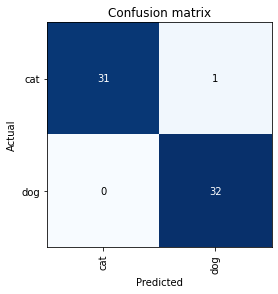

In [0]:
interp.plot_confusion_matrix()

We can also see whether our model will predict the right label for individual pictures. Below, we have the 21st image in our cats folder. 

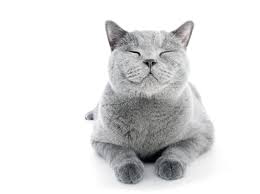

In [0]:
img = open_image(path/'cat'/'00000021.jpg')
img

By calling `learn.predict()` and passing in the image above, we can see the `pred_class`, or the predicted class our model gave to the image. It is correct, the image indeed is a cat. Our model was correct!

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category cat

In this notebook, you have seen how to use a convolutional neural network and how to build your own with your own images. 